#House Prices Predictor

The following task is to predict **median house values in Californian districts**, given a number of features from these districts.

Project Plan
1. Connect to Google drive or Kaggle API
2. Import and inspect the Data
3. Split the data into training and testing datasets
4. Prepare the data for Machine Learning Algorithms
5. Hyperparamter Tuning 
6. Transormation Pipeline
7. Model Selection and Data Evaluation
8. Ensemble Methods
9. Saving the model (Pickle or Joblib)
10. Fine-tune model 
11. Evaluate your system on the test set

# 1. Connect to Google Drive or Kaggle API

In [ ]:
print('Booting into Machine Learning...')

Booting into Machine Learning...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle (1).json to kaggle (1) (1).json


{'kaggle (1).json': b'{"username":"jonnytan555","key":"c5ec520d474c564a38118f8ea3fa400b"}'}

In [ ]:
! cp kaggle(1).json ~/.kaggle/

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` cp kaggle(1).json ~/.kaggle/'


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


# 2. Import and inspect the data

In [ ]:
file = '/content/drive/MyDrive/Programing/Colab Notebooks/Models and Data/housing.csv'
housing = pd.read_csv(file)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 data entries
- all floats apart from ocean_proximity, 
- total_bedrooms = 20433, so 207 districts are missing this value

In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.drop(housing[['longitude','latitude']],axis=1).describe()


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c8761e8d0>,
      dtype=object)

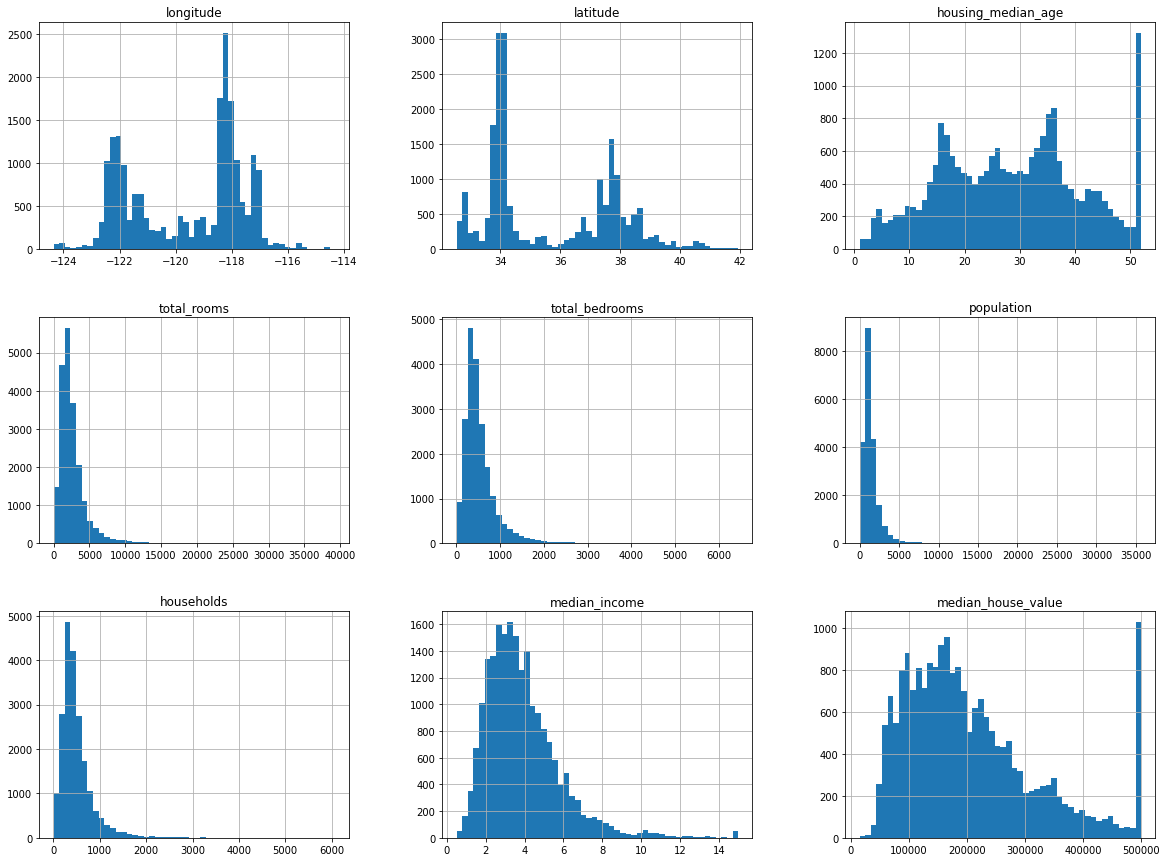

In [ ]:
housing.hist(bins=50,figsize=(20,15)) #Noticable skewness in some plots, will need to normalise later on.

In [ ]:
#Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use('ggplot')
%matplotlib inline

## Import Libaries

Import the pandas, numpy, matplotlib('ggplot') and seaborn libaries

## Analysis of histograms 

1. Median Income is expressed in US dollars, however the data has been scaled and capped at 15 and at 0.5 for lower incomes.

- Preprocessed data sets are common and not neccessarily a problem.
But it is helpful to understand the dataset.

2. Housing median age and median house value are also capped.

- Could be a probelm as our targhet variable is capped. 
The algorithm may not be able to learn past this cap)

3. The attributes have lots of different scales

- This will need feature scalling

4. Histograms ahve a heavy tail

- Skewness can result in the algorithm
not detecting patterns

# 3. Split the data into training and testing datasets

Split data into train and test sets 
- At an 80% train
- 20% test ratio

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

In [ ]:
train_set.shape

(16512, 10)

In [ ]:
test_set.shape

(4128, 10)

Train_test_split produces a random split of the data.

An expert has informed you that a **Median income** can be viewed as very important in predicting median house prices



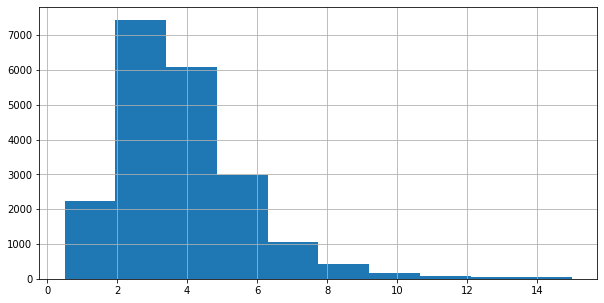

In [ ]:
housing['median_income'].hist(bins=10, figsize=(10,5))

To make sure the dataset is test is representative of all the various 
catergories of incomes in the whole dataset would can set up bins.

Median income is continous so we must create an income catergory attribute. Most median income values are clustered around 2-5(tens of thousands of dollars)

Buts some go beyond 6. Important to have sufficient number of instances in your dataset for each stratum, or the estimate of the stratum's importance may be biased.

In [ ]:
#create a housing catergory attribute by dividing the median by 1.5(limit number of income catergories and rounding (ceil to have discrete values)

housing['income_cat'] = np.ceil(housing["median_income"] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [ ]:
#view income catergory proportions in the full housing dataset

pd.DataFrame(housing['income_cat'].value_counts()/len(housing))

,income_cat
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


## Stratified Sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [ ]:
#Remove the income_cat attribute, so the data is back to the origonal state
for set in (strat_train_set, strat_test_set):
  set.drop(["income_cat"], axis=1, inplace=True)

## Visualise the Data to discover and gain insights

For geographical infromation its a good idea to create a sactter plot of all the districts to visualsie the data.

Can see high density areas (Bay area, Los angeles and San Diego)

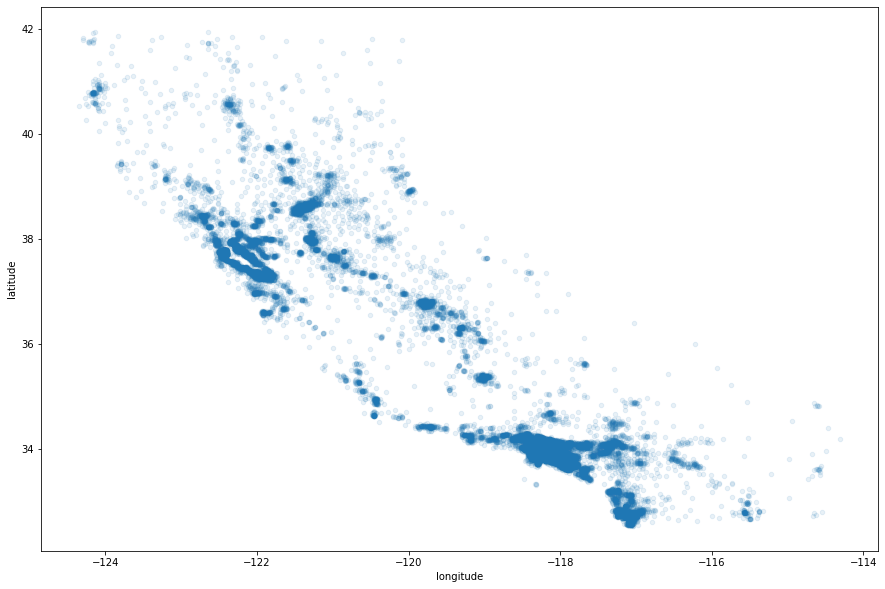

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(15,10), alpha=0.1)


##Investigate housing prices


**Circle radius** represents the population of the district

**Color** represents the price 

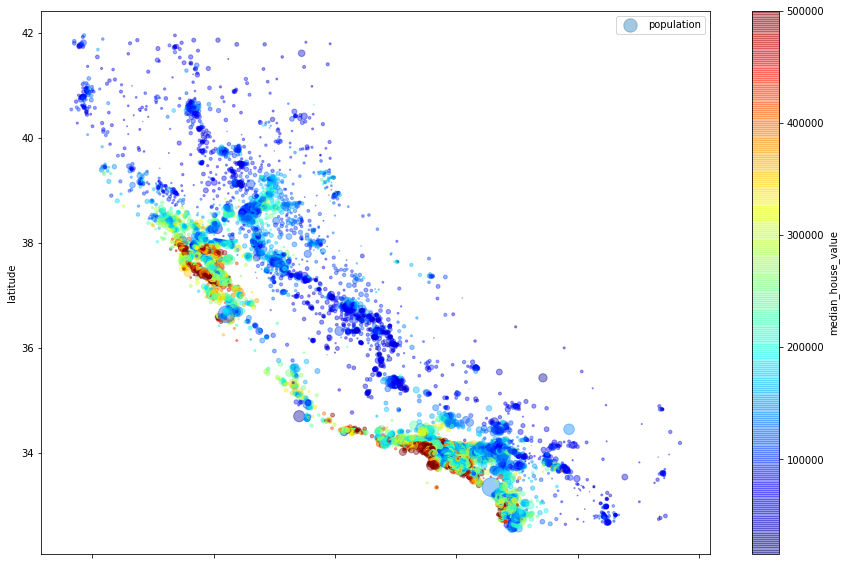

In [ ]:
housing.plot(kind='scatter',  x='longitude', y='latitude', figsize=(15,10),alpha=0.4,
             s=housing["population"]/100, label='population', c="median_house_value", 
             cmap=plt.get_cmap("jet"),  colorbar=True,
             )
plt.legend()

This visualisation shows us that the location (i.e close to ocean) of the house and population density are very important when pricing houses.

A clustering algorithm ould be used to detect the main clusters, and add new features that measure the proximity of the cluster centres.

The ocean proximity attribute may be helpful aswell (however in northern californis the hosuing prices in coastal districts are not too high, so this is not a simple rule)

## Looking for correlations

Since the dataset is not too large, you can easily compute the **Standard Corelation Coefficient** (Pearson's r) between every pair of attributes using the corr() method

In [ ]:
corr_matrix = housing.corr()

Investigating how each attribute correlates with the median house value

Correlation between -1 and 1 

example: negative correlation between median house prices and latitide 
i.e as you move more north, house prices reduce 

In [ ]:
pd.DataFrame(corr_matrix['median_house_value'].sort_values(ascending=False))

,median_house_value
median_house_value,1.000000
median_income,0.688075
income_cat,0.643892
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


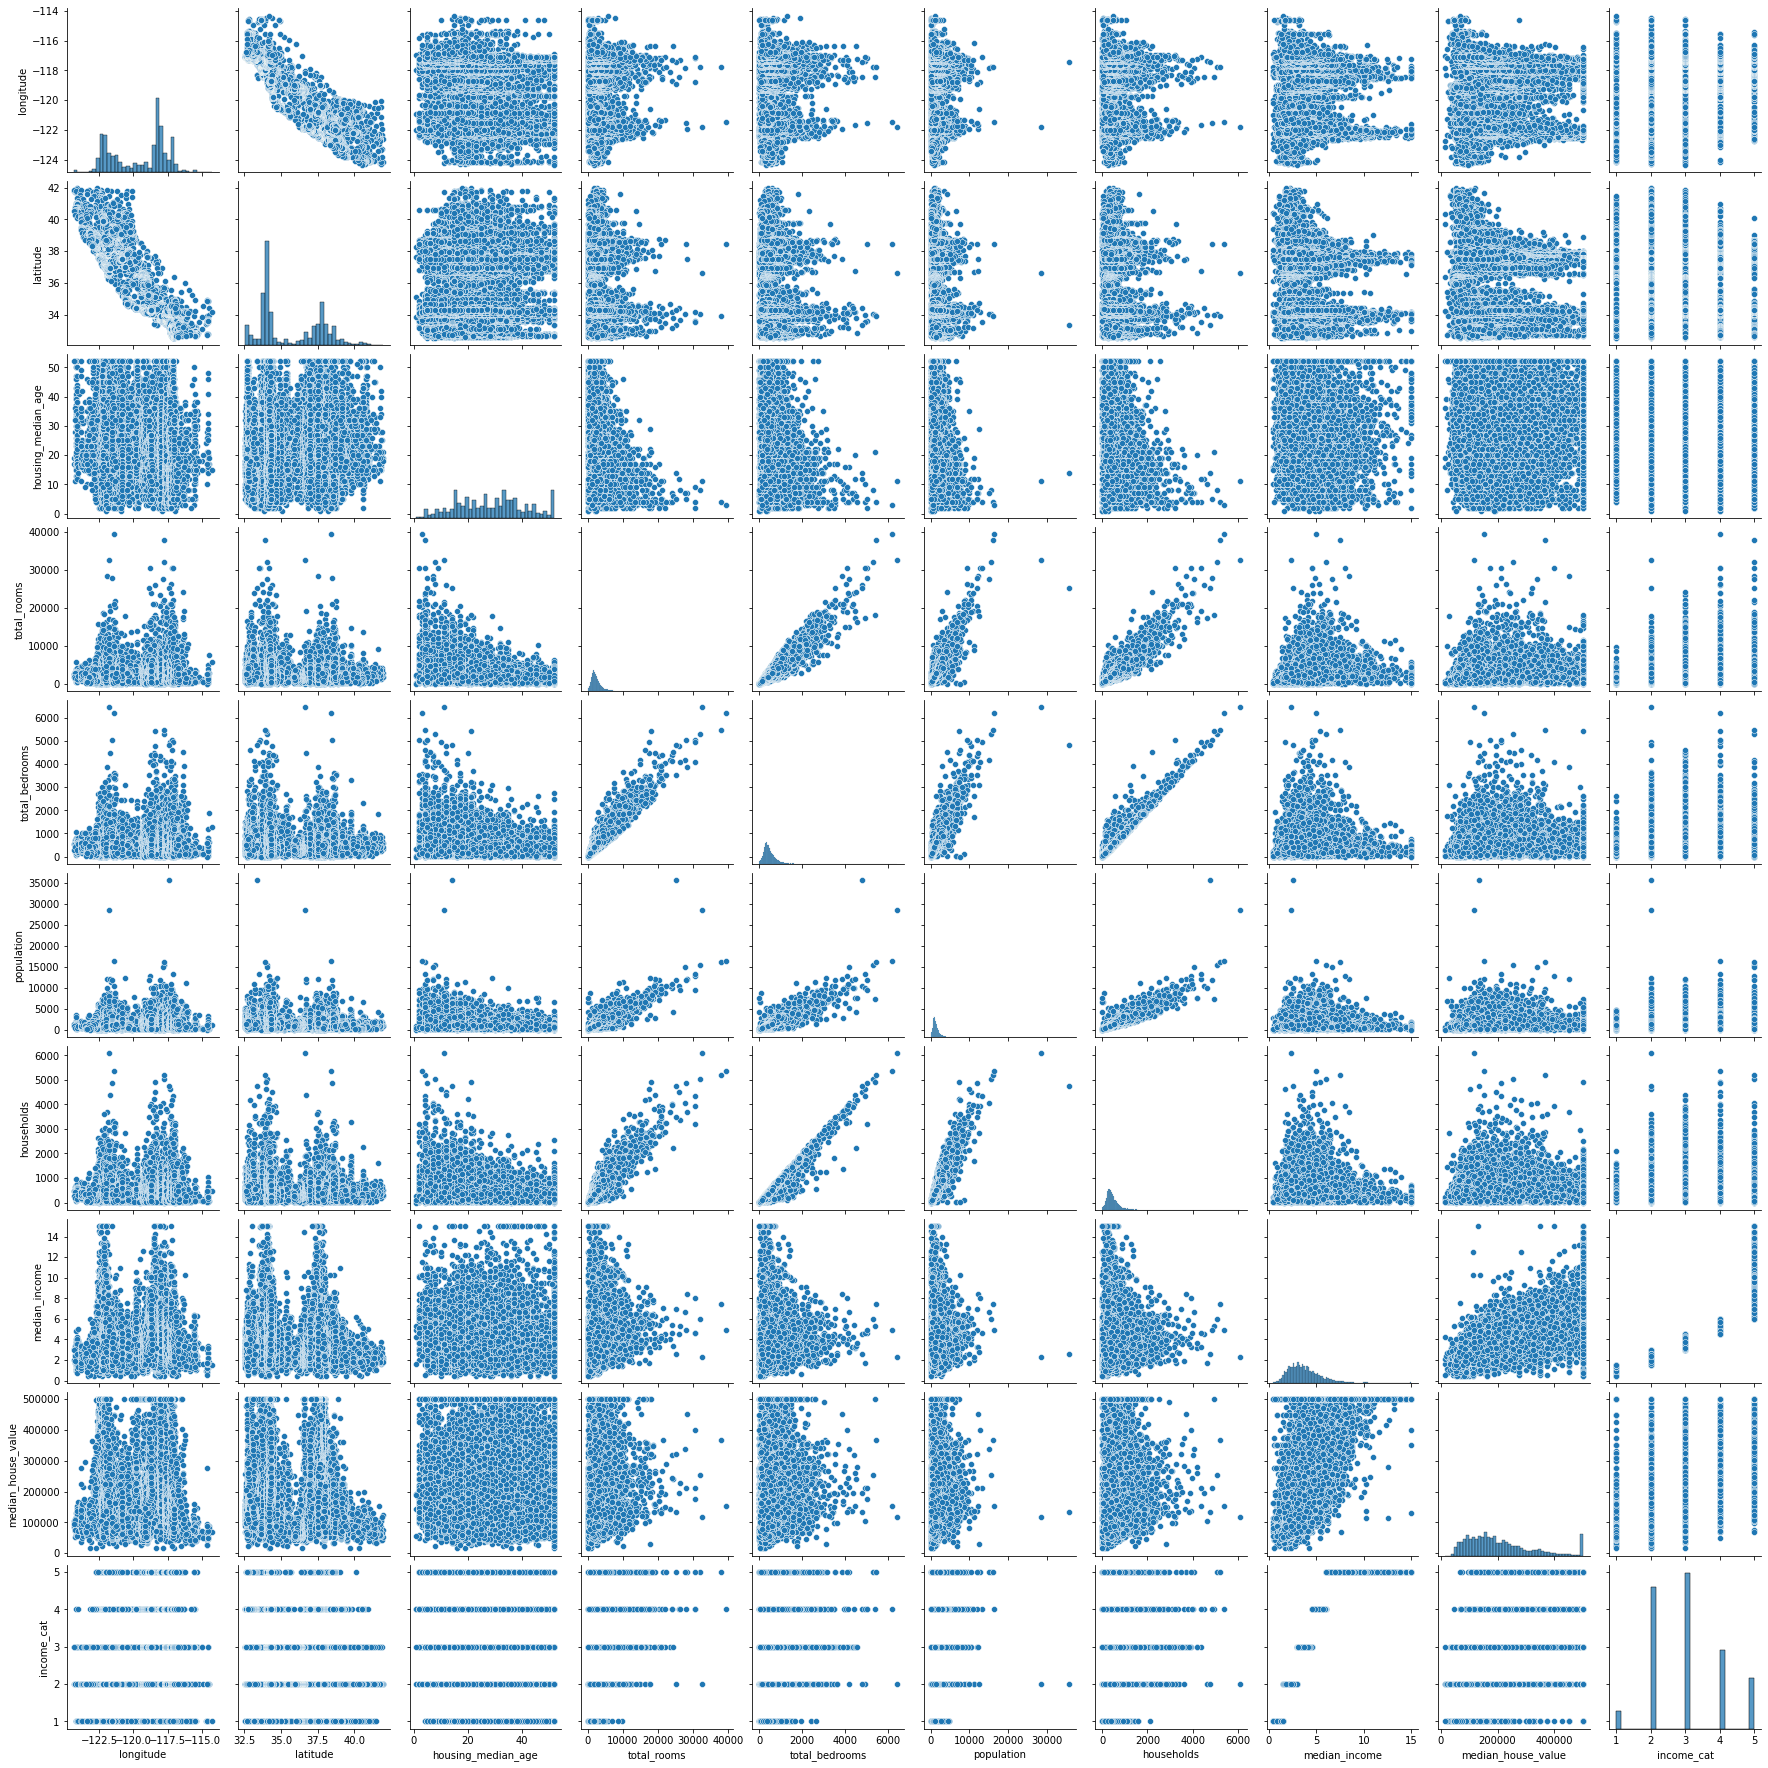

In [ ]:
import seaborn as sns
house = housing.drop('ocean_proximity', axis=1)
sns.pairplot(house)

Alternative correlation method. Choose top 4 most correlated attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c76ad7128>,
      dtype=object)

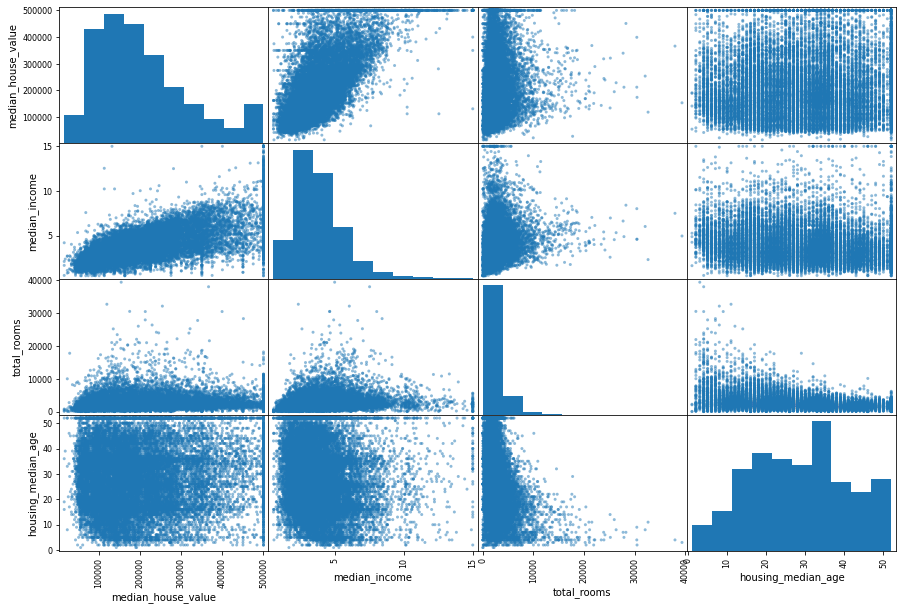

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(15,10))

The most promising attribute to predict the median house value is the **median income**

The correlation is strong. Clearly an upward trend.

The price cap is clearly visible from the horozonatal line at the top at. 

This can be viewed at 500,000 dollars. Other less obvious horozonatal lines are visible around 450,000 dollars and 350,000 dollars, and maybe 280,000 dollars

Potenially want to remove these districts, so the algorithms won't learn these quirks.

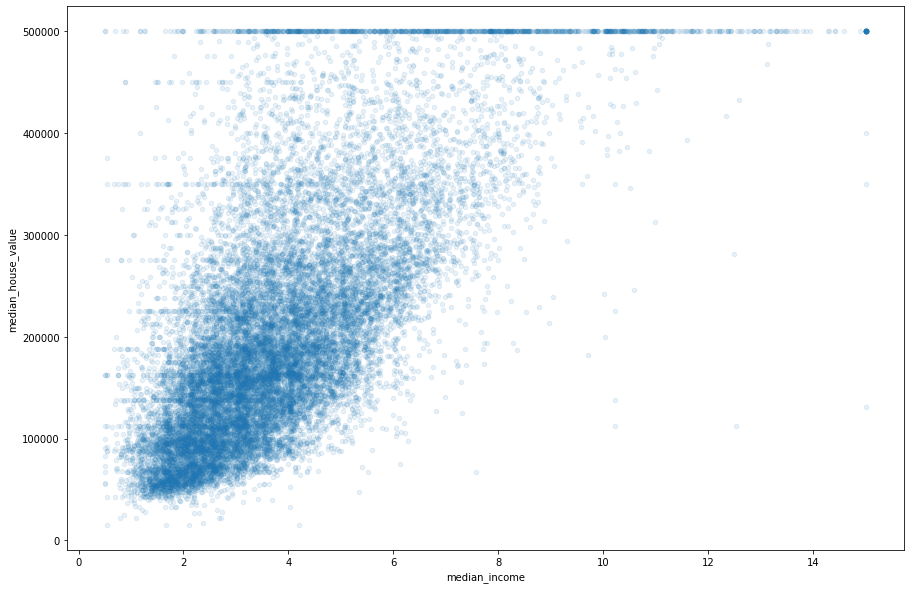

In [ ]:
#View scatter plot

housing.plot(kind='scatter', x='median_income',y='median_house_value',alpha=0.1, figsize=(15,10))

## Feature Engineering - Experimenting with Attribute Combinations 

Last thing to do to prepare your model for feeding into a machine learning algorithm is to try out various attribute combinations.

In [ ]:
#The Total number of rooms is not that helpful. However, the number of rooms per household is 

housing['rooms_per_household'] = housing['total_rooms']/housing['households']

#the total number of bedrooms by itself is not very helpful. You want to compare it to the number of rooms

housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

#The population per household also seems like an intersting attribute combination

housing['population_per_household'] = housing['population']/housing['households']


In [ ]:
#re-evaluate correlation matrix with new engineered features
corr_matrix = housing.corr()
pd.DataFrame(corr_matrix['median_house_value'].sort_values(ascending=False))


,median_house_value
median_house_value,1.000000
median_income,0.688075
income_cat,0.643892
rooms_per_household,0.151948
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population_per_household,-0.023737
population,-0.024650


Insights

1. Houses with a lower bedroom/room ratio tend to be more expensive 
i.e more bedrooms = more expensive house 

2. The number of rooms per household is more helpful than the total number of rooms in a district 

# 4. Preparing the data for Machine learning Algorithms

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Cleaning the Data


Most machine learning algorithms cannot work with missing values, must fix this with either of 3 options:

1. Get rid of the corresponding districts

housing.dropna(subset=['total_bedrooms']) 

2. Get rid of the whole attribute

housing.dropna(['total_bedrooms'],axis=1) 

3. Set the values to sum value (zero,mean, median, etc)  

median = housing['total_bedrooms'].median
housing =  housing['total_bedrooms'].fillna(median)

**We will opt for method 3**

Sklearn provides a method for dealing with missing values: **The imputer**

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [ ]:
#median can only be computed for numeric data
#must create a copy of the data without the ocean_proximity attribute

housing_num = housing.drop('ocean_proximity', axis =1)

##Using the Imputer

In [ ]:
#fit the data set to the imputer

est = imputer.fit(housing_num)

In [ ]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [ ]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

What has happened?

The imputer has computed the median for each attribute and stored the result in the statistics_instance variable. 

Only total_bedrooms had missing attributes. However, we don't know if future datasets will have missing values when the system goes live. So its safer to apply the imputer to all numeric attributes.

In [ ]:
#Now you use the 'trained' imputer to transform the features and view the transformed features in a Dataframe

X=imputer.transform(housing_num) #fit_transform method can be used aswell

housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


## Handling Text and Catergorical Attributes

Ocean_proximity was left out earlier as it cannot be used to compute a median. 
ML algorithms prefer to work with numeric data


In [ ]:
# pd.get_dummes method, to create a DataFrame of binary values for each label

housing_cat = housing['ocean_proximity']
pd.get_dummies(housing_cat)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17606,1,0,0,0,0
18632,1,0,0,0,0
14650,0,0,0,0,1
3230,0,1,0,0,0
3555,1,0,0,0,0
...,...,...,...,...,...
6563,0,1,0,0,0
12053,0,1,0,0,0
13908,0,1,0,0,0
11159,1,0,0,0,0


Sklearn provides a transformer for catergoric data called the **label encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#List yoour catergoric attribute

housing_cat = housing['ocean_proximity']

#fit the encoder and transform the data

housing_cat_endcoded = encoder.fit_transform(housing_cat)

In [ ]:
#View encoded results
housing_cat_endcoded

array([0, 0, 4, ..., 1, 0, 3])

In [ ]:
#View mapping
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
#OneHotEncoder method to convert the values to binary, so that one higher numeric value does not gain a higher advantage

from sklearn.preprocessing import OneHotEncoder

#initialize encoder

encoder = OneHotEncoder()

#Fit data to encoder

housing_cat_1hot = encoder.fit_transform(housing_cat_endcoded.reshape(-1,1)) 

#Note: reshpe() function allows one dimension to be -1, which mean "un-specified"
#The value is inferred from the length of the array and remaining dimensions

In [ ]:
#view mapping

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## What is a Sparse Array?

This outputs a Sparse Matrix, instead of a NumPy array provided by the pd.get_dummies method. 

A sparse matrix is useful when you have thousands of catergories. Storing a lot of 1's and 0's in there own dataframe is very wastefull of memory. 

The Sparse matrix only stores the position of non-zero elements

In [ ]:
#A sparse matrix works mostly like a normal 2D array, but if you can convert it to a desnse NumPy array

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Using a Label Binarizer

We can apply both our transformations (from text catergories, then from integer catergories to one-hot vectors) in one process using the LabelBinarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer

#initialize encoder

encoder = LabelBinarizer()

#fit and transform data

housing_cat_1hot = encoder.fit_transform(housing_cat)

In [ ]:
#view transformation
housing_cat_1hot

#Note: this outputs a dense 2D array, You can get a sparse matrix 
#by passing sparse_output = True in constructor 

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

SkLearn provides a lot of many useful transformers, you will need to write your own tasks such as custom cleanup operations or combining specific attributes.

You will want your transformer to work seamlessly with sklearn functionalites (e.g. pipelines). You wil just need to implement three methods 
1. fit() 
2. transform()  
3. fit_transform()

The final applied for free by adding the TransformerMixin as a base class ( and avoid * args and **kargs in your constructor)

BaseEstimator base class will get you two extra methods 
1. get_parms() 
2. set_parms())

These are useful for automatic hyperparamter tuning





# 5. Hyperparameter tuning

A transformer class adds the combined attributes we discussed earlier together.

i.e rooms per household, bedrooms per household, population per household

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  #defining the class
  def __init__(self,add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
 
  #definining the fit function
  def fit(self, X, y=None):
    return self #nothing else to do
  
  #definining the transform function
  def transform(self, X, y=None):
    #rooms per household
    rooms_per_household = X[:, rooms_ix] / X[:,household_ix]
    #population per household
    population_per_household = X[:,population_ix] / X[:,household_ix]
    #bedrooms per household
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
#Calling the class
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

#Iniating the transformation
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, **add_bedrooms_per_room**, set to true by default.

*This hyperparameter will allow you to easily find out whether adding the attribute helps the ML algorithm or not.* 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% about. 

The more you automate these data preparation steps, the more combinations you can automatically try out making it much more likley that you will find a great combination (and save a lot of time)

In [ ]:
#adding extra attributes
housing_extra_attribs = pd.DataFrame(housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household","population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


## Feature Scaling

ML algotithms don't perform well when input numerical attribute that have different scales.

e.g. total number of rooms ranges from 6 to 39,320 while the median only ranges from 0 to 15. 

*Note: scalling the target variables is genaerally not necessary*

There are two main ways to get the attributes to have the same scale
1. min-max scaling 
2. standardization

##Min_Max scaling

Min-max-scaling (or Normalization) is simple: values are shifted and rescaled to end up ranging from 0-1. 

this is achieved by subtracting the min value and dividing my the max minus the min. This is done using the **MinMaxScaler** package from sklearn

##Standardiazation

First the mean value is subtracted(so standardized values always have a mean of zero), and then it divides by the variance so that the resulting distribution has unit variance. 

Unlike min-max-scaling, standardization does not bound values to a specific range (this can be a problem for some algorithms i.e Neural Net often expect an input value ranging from 0 to 1).

However, standardization is much less affected by outliers. i.e a district had  a median income equal to 100 (by mistake). Min-max scaling would crusgh ll the other values from 0-15 down to 0-0.015, whereas standardization would not be much affected. 

Sk-learn provides the transformer called **StandardScaler** for standardization





# 6. Transformation Pipelines 

A lot of data transformation steps need to be executed in the right order. 

Sklearn provides the **Pipeline** class to to help with such sequences of transformations.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#this pipeline automates the imputing, adding of the new attributes and scaling phases
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy='median')),
          ('attribs_adder', CombinedAttributesAdder()),
          ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
#view the encoded data

housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

The **Pipeline** Constructor tackles a list of name/estimator pairs defining the seqeunce of steps. *All but the last estimator must be transformed* (i.e must have a fit_transform method)

When you call the pipelines fit() method, it calls fit_transform() sequencially on all transformers, passing the output for each as a parameter of the next call, until it reaches the final estimator.

A Pipeline is now created for numerical values. the LabelBinarizer needs to be applied to catergorical values. How can this be done?

Sk-learn has a class called **FeatureUnion**. You can give it a list of transformers, when transform() is run, all the transform methods are run

## Designing a full Pipeline (Numeric and catergoric Data)

In [ ]:
from sklearn.compose import ColumnTransformer

#list numeric attributes
num_attribs = list(housing_num)
#list catergoric attributes
cat_attribs = ["ocean_proximity"]

##Full Pipeline

In [ ]:
full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])

Now that the data has been transformed using the full pipeline - It is ready to be passed through the algorithms

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared.shape

(16512, 16)

# 7. Model Selection and Data Evaluation

The problem has been framed, 
- You have the data and have explored it, 
- The sample traing set and test set have been set,
- The pipelines have been written to clean up the proccess and prepare the model for Machine Learning algorithms.

Now apply a variety of models

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

#initialise the model
lg = LinearRegression()

#fit the dataset
lg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Time to try out the model
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Predictions:", lg.predict(some_data_prepared))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [ ]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


### RMSE

Apply sklearn RMSE function

The model works but is not very accurate (40% off on the first prediction)

In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions) 

lin_rmse = np.sqrt(lin_mse)

lin_rmse

68628.19819848923

This value is better but still not great

Most districst median_housing_values range bewteen 120,000 and 265,000 - so an error of around 68,000 is not satisfying.

**Analysis of model**

The example model is underfittingthe training data. This happens when the features do not provide enough information to make a good prediction, or the model is not powerful enough.

**How to fix the model**

The main ways of fixing this are to 
1. Select a **more powerful model**
2. Feed the training algorithm with **better features**,
3. **Reduce the constraints** on the model (this model is not regularized, so this rule cannot be applied)

Could add more features.

First try a more complex model 

## More complex Modelling

###Decison Tree Regressor

Train a Decision Tree Regressor, this model helps find non-linear realtionships in the Data.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

The model is trained, now predict...

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions) 
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

0 error is very unlikely. More likley the model has overfit. Why can we be sure ?

You should not touch the test set until you are ready to launch a model that you are confident about, so you need to use part of the training set for traing and part for model validation. 

## Cross Validation

Using sklearns k-fold cross-validation feature, the following code randomly splits the training set into 10 distainct subsets called folds.

It then trains and evaluates the Decision Tree model 10 times, picking a different fold for evaluation every time and training on the other 9 folds.

The result is an array containing the 10 evaluation scores for the decission tree regressor.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores) #computes based on negative 

Inspect the results 

Note: the cross val score allows you to not only get an estimate the performance of your model but also how precise an estimate it is (i.e standard deviation)

The Decision Tree score 71,407, generally +- 2,439

But cross validation comes at the price of training your model several times, which is not always possible

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [69783.0338885  67495.30336037 70804.40474797 68617.60243508
 69606.8024015  74844.35717468 70777.68320346 70245.24333496
 77841.04284596 69554.97406979]
Mean: 70957.04474622621
Standard deviation: 2927.2283879066586


Compute the cross val score for the linear regression to check

In [ ]:
scores = cross_val_score(lg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-scores)

#Plug results back into function

display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


# 8. Ensemble Methods

Time to test out one last model: the **RandomForestRegressor**

*Random forrests* work by training many *Decision trees* on random subsets of the features, then averageing out their predictions. 

Building *a model on top of another model* is called *Ensemble Learning*

Its often a great way to way to push ML algorithms even further. 

Import and initialise the Random Forest Regressor model and then fit the data.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Compute the cross val score for the Random Forrest Regressor to check.

In [ ]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

forest_reg_rmse_scores = np.sqrt(-scores)

#Plug results back into function

display_scores(forest_reg_rmse_scores)



Scores: [49265.69459666 47535.79561066 50146.96057216 52262.51491705
 49867.27422856 53753.70016054 48871.4016828  48028.04964086
 53414.96273021 50041.47931449]
Mean: 50318.78334539883
Standard deviation: 2041.3168551919744


###Model analysis

The random forest model looks much more promising.

However, the training score is still much lower than on the validation set - meaning the modle is still **over-fitting** the training set.


###Possible solutions to overfitting

1. Simplify the model
2. Constrain it (i.e regularize)
3. Get more training data. 

There are a lot more training models to try out from various different catergories of ML (several **Support Vector Machines** with different kernals, possibibly **Neural Networks**) *without spending too much time tweaking hyperparameters.* 

The goal is to shortlist a few (two to five) promising models. 


# 9. Save models (pickle and joblib)

You should save every model you experiment with, so you can come back to any model you want. 

Make sure you save 

1. the hyperparameters
2. the trained parameters
3. The cross validation scores
4. the actual predictions

You can easily compare the scores across multiple model types and compare the types of errors that you made.


You can eaisly save Sckit_learn models using Python's **Pickle** module.

Or using **sklearn.externals.joblib** which is more efficient at serializing large NumPy array's.

##Pickle

In [ ]:
import pickle

with open('linear_regression','wb') as f: #wb - write binary
  pickle.dump(lg,f)

with open('linear_regression', 'rb') as f:
  model = pickle.load(f)

model.predict(housing_prepared)

array([210644.60459286, 317768.80697211, 210956.43331178, ...,
        95464.57062437, 214353.22541713, 276426.4692067 ])

##Joblib 

Job lib better to use when dealing with large Numpy Arrays

In [ ]:
from sklearn.externals import joblib
joblib.dump(lg, "Linear_Regression.pkl")
# and later 

LinearRegressionModel = joblib.load("Linear_Regression.pkl")

LinearRegressionModel.predict(housing_prepared)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([210644.60459286, 317768.80697211, 210956.43331178, ...,
        95464.57062437, 214353.22541713, 276426.4692067 ])

# 10. Fine-Tune the Model

A short listof models have been listed. They now need to be fine-tuned

## Grid Search

One way to fine-tune is too fiddle with the hyperparamters manually, until you find a great combination of hyperparameter values - Very tedious though.

Sklearn's **GridSearchCV** can search for you.

Just tell it the 
1. parameters you wnt to experiment with
2. What values to try out

It will evaluate all possible combinations of the hyperparameter values, using cross-validation

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

The para_grid tells sklearn to first evaluate 3 x 4 = 12 combinations of **n_estimators** and **max_features** hyperparameter values specified in the first dict.

Then try all 2 x 3 = 6 combinations of of hyperparameter, but with **bootstrap** set to false instead of true (default value for parameter.


All in all, the grid search will explore 12 + 16 = 18 combiantions of the **RandomForestRegressor** hyperparameter values. 

It will train the model 5 times using **five-fold cross validation**) - the model will be trained 18 x 5 = 90 rounds of training. May takle a while.

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)

Train across 5 folds, that's a total of (12+6)*5=90 rounds of training 

In [ ]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [ ]:
grid_search.fit(housing_prepared, housing_labels)

When you have no idea what value of hyperparameter you should have, a simple approach such as *to try out consectutive powers of 10* (or a smaller number of you want more fine grained search, as shown in the example with the **n_estimators** hyperparameters)



In [ ]:
grid_search.best_params_

Since 8 and 30 are the maximum values that were evaluated, you should probably try searching again with higher values, the score may improve. 

You can get the best estimator directly

In [ ]:
grid_search.best_estimator_

If **GridSearchCv** is initialized with refit=True (default), then once it *finds the best estimator* using a cross-validation it retrains it on the whole training set. 

This usually improves the performance

### Evaluation scores 

In [ ]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres['params']):
  print(np.sqrt(-mean_score), params)

We obtain the best solution by setting the

1. **max_features** hyperparameter to 8, 
2. **n_estimators** hyperparameter to 30.

The RMSE score for this combination is 49,682 which is a significantly better score than we got earlier using the default parameter values (around 50,182)


###Fine tuning our best model

We have successfully fine tuned our best model!!!

Note: You can trate some of the data preperation steps as hyperparameters. e.g the grid search will automatically find out whether or not to add a feature you were not that sure about ( e.g using the **add_bedrooms_per_room** hyperparameter of your **CombinedAttributesAdder** transformer). It may also used to automatically find the best way to handle outliers, missing features, feature selection, and more 

## Randomized Search

**Grid Search** is fine when you are *exploring relativly few combinations*, like in the previous example, but **when the hyperparameter search space is large**, its is often preferable to use a a **RandomizedSearchCV** instead. 

This can be *used in the same way as the GridSearchCV class* but *instead of trying out all possible combinations, it evaluates a given number of random combinations* by selecting a random value for each hyperparameter at every iteration. 


##Benifits of Randomized Search

1. If you let the randomizer search for say 1,000 iterations, *this approch wil explore 1,000 different values for each hyperparameter* (instead of just a few values per hyperparameter, like in the GridSearch).

2. You have *more control over the computing budget you want to allocate to hyperparameter search*, simply by setting the number of iterations. 


## Ensemble Methods for model fine tuning

Another way to *fine tune* your system is to try to **combine the models that perform the best**. 

The group (or "ensemble") *will perform better than the best individual model *(just like Random Forests perform better than Individual Tress they rely on), especially if the individual models make very different types of errors

### Analyse the best models for their errors

Gain good insight by inspecting the best model 

i.e the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [ ]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

Corresponding importance names

In [ ]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse = True)

With this information, you **may want to try dropping some less useful features** (e.g apparently only one ocean_proximity catergory is really useful, so you could try dropping the others)

Also, **look at the specific errors that your system makes**, then try to understand **why it makes them and what could fix the problem** (adding features or, on the countrary, getting rid of uninformative ones, cleaning up outliers, etc)

# 11. Evaluate your system on the Test Set

After tweaking your model for a while, you have the system that performs sufficiently well. Now you must evaluate the final model on the test set. 

Simply, 

1. Get the predictors and the lables from your test set 
2. Run your **full_pipeline** to transform the data 
( call **transform()**, not **fit_transform**, you do not want to fit to the test set yet)
3. Evaluate the model on the test set

In [ ]:
final_model = grid_search.best_estimator_

Split into Test data into predictors and labels

In [ ]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()


Fit to pipeline

In [ ]:
X_test_prepared = full_pipeline.transform(X_test)

Make predictions

In [ ]:
final_predictions = final_model.predict(X_test_prepared)

View final error

In [ ]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

## 95% interval

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: 

What if it is just 0.1% better than the model currently in production? 

You might want an idea of how precise this estimate is. 

For this you can **compute a 95% confidence interval for the generalization error** using scipy.stats.t.interval()

In [ ]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2

np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors )))

The performance will **usually be slightly worse than the what you measured using the cross validation** if you did a lot of hyperparameter tuning.

This is beacuse your system will be fine-tuned to perform well on the validation data, and will not perform as well on the unkown dataset. 

It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements will unlikley generalize to new data. 

## Final Stage

Now comes the project launch phase, you need to:

1. **Present your solution**
- highlighting what you have learned
- what worked 
- what did not
- what assumptions were made
- what your system's limitations were

2. **Document everything**

3. **Create nice presentations with clear vizualisations 
- Include easy to remember statements 
  e.g "the **median income is the number one predictor of housing prices**"

In this example the model was not better than the experts, but its still probably better to launch the model, if it can free up some time for the experts to work on some more interesting and productive tasks. 

## Launch, Monitor, and Maintain Your System 

The model is not ready to launch! The solution needs to be ready for production, in particular by 
1. Plugging the production input data sources into your system
2. Writing tests

You need to write **monitoring code** to *check your system's live performance at regular intervals* and *trigger alerts when it drops.* 

This is important to catch not only **sudden breakage**, but also **system degredation**. 

This is quite common as models tent to 'rot' as data evolves over time, unless the models are regularly trained on fresh data. 

## Evaluating your systems performance 

- Evaluating your system's performamce will require sampling the system's predictions and evaluating them. This will require human analysis. **A human analysis section needs to be added yo your pipeline for your system**. 

- You should also make sure you **evalaute the system's input data quality**. Sometimes performane will degrade slightly beacuse of poor quality signal (e.g a malfunctioning sensor sending random values, or anther team's output becomeing stale), but it may take time for system to degrade enough to trigger an alert. 

- If you monitor your system's input, you can catch this early. Monitoring inputs is particularly important for online learning systems. 

- Finally, you want to **train your modles regualarly using fresh data**. You should automate this proccess as much as possible. If you dont, you are very likely to refresh the modle every six months (at best), and your system's performace may fluctuate severly over time. If your system is an online learning system, you should make sure you save snapshots of its state at regular intervals so you can easily roll back to a previously working state. 

#Additional Exercises

1. Try a Support Vector Machine regressor (sklearn.svm.SVR), with various hyper‐
parameters such as:

kernel="linear" (with various values for the C hyperparameter) 

kernel="rbf" (with various values for the C and gamma hyperparameters). 

Don’t worry about what these hyperparameters mean for now.
How does the best SVR predictor perform?

##Support Vector Regressor (rbf)

In [ ]:
from sklearn.svm import SVR

SVR = SVR()
SVR.fit(housing_prepared, housing_labels)

In [ ]:
SVR.predict(housing_prepared)

In [ ]:
mse = mean_squared_error(housing_labels,housing_predictions)
rmse = np.sqrt(mse)
rmse

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVR, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

SVR_rmse_scores = np.sqrt(-scores)
SVR_rmse_scores

In [ ]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(SVR_rmse_scores)

###Support Vector Regressor (linear)

In [ ]:
from sklearn.svm import SVR

SVR_kl = SVR(kernel='linear')
SVR_kl.fit(housing_prepared, housing_labels)

In [ ]:
scores = cross_val_score(SVR_kl, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

SVR_kl_rmse_scores = np.sqrt(-scores)
SVR_kl_rmse_scores